# SymPy 
https://www.sympy.org/en/index.html

**SymPy** 是 Python 的“符号计算”库——能“像手算一样”做代数、微积分、方程求解、线性代数等。

SymPy 是 Python 的符号计算库，支持代数、微积分、方程求解、线性代数、微分方程等。  
本讲义强调“会教、会用”：把物理关系**转为可计算表达**，并用**符号+数值+可视化**完成一体化教学演示。

---

## 0. 安装与导入
- 安装： `conda install sympy` or `pip install sympy`
- 导入：`import sympy as sp`
- 显示友好：`sp.init_printing()`（在 Notebook 中用漂亮的数学排版）

In [11]:
import sympy as sp

In [12]:
sp.init_printing()

---
## 1. 符号表达

### 1.1 变量定义
**核心概念**：`sp.Symbol` vs `sp.symbols`

- `sp.Symbol(name, **assumptions)`：创建单个符号。

- `sp.symbols(names, **assumptions)`：按字符串批量创建符号（返回一个或多个 `Symbol`）。

In [14]:
#sp.Symbol?

In [15]:
z = sp.Symbol('z', real=True)
z

### 1.2 常用“变量设定” ： 给符号加属性（有助于化简、解方程、判定号、积分/极限等）

#### 常见属性

In [17]:
# 实/复、正负性、整型、非零、有限等
r   = sp.symbols('r', real=True)
p   = sp.symbols('p', positive=True)            # p > 0
n   = sp.symbols('n', integer=True)             # 整数
k   = sp.symbols('k', integer=True, nonnegative=True)  # 非负整数
t   = sp.symbols('t', real=True, finite=True)
u   = sp.symbols('u', nonzero=True)

In [18]:
# 其他常见：even/odd（偶/奇整数）、prime（素数）、negative、nonpositive 等
m_even = sp.symbols('m', integer=True, even=True)
q_odd  = sp.symbols('q', integer=True, odd=True)

In [19]:
m_even, q_odd

In [20]:
x, y = sp.symbols('x y', positive=True, real=True)

In [21]:

a, b, c = sp.symbols('a b c', positive=True, real=True)

In [22]:
r, p, n, k, t, u

#### 切片写法

切片式范围：`x0:5、x:5`

`x0:5` → 生成 `x0, x1, x2, x3, x4`

`x:5` → 生成 `x0, x1, x2, x3, x4`（默认从 0 开始）

In [24]:
x0, x1, x2, x3, x4 = sp.symbols('x0:5', real=True)
x0, x1, x2, x3, x4

In [25]:
x0_, x1_, x2_, x3_, x4_ = sp.symbols('x:5', positive=True)
x0_, x1_, x2_, x3_, x4_

多行/矩阵式

In [27]:
a1, a2, a3, b1, b2 = sp.symbols('a1:4 b1:3')   # a1 a2 a3, b1 b2
a1, a2, a3, b1, b2

In [28]:
sp.symbols('a1:4:3')

#### 矩阵写法

In [30]:
m, n = 3, 4                # 想要 a_{i,j} 的尺寸
A = sp.Matrix(m, n, lambda i, j: sp.Symbol(f"a{i+1}_{j+1}"))
A

⎡a₁ ₁  a₁ ₂  a₁ ₃  a₁ ₄⎤
⎢                      ⎥
⎢a₂ ₁  a₂ ₂  a₂ ₃  a₂ ₄⎥
⎢                      ⎥
⎣a₃ ₁  a₃ ₂  a₃ ₃  a₃ ₄⎦

In [31]:
m, n = 2, 3
A = sp.Matrix([[sp.Symbol(f"a{i}_{j}") for j in range(1, n+1)]
                                      for i in range(1, m+1)])
A

⎡a₁ ₁  a₁ ₂  a₁ ₃⎤
⎢                ⎥
⎣a₂ ₁  a₂ ₂  a₂ ₃⎦

#### 命名技巧：下标、希腊字母、带下划线

In [33]:
# 下标：直接用字符串 + 下划线
x_1 = sp.Symbol('x_1')                 # 显示为 x₁（Pretty Printing）
x_1

In [34]:
alpha, beta, gamma = sp.symbols('alpha beta gamma', real=True)  # 希腊名直接写
alpha, beta, gamma

In [35]:
# 复杂名字也可以（不推荐空格）：
R_eq = sp.Symbol('R_eq', positive=True)   # 等效电阻
R_eq

$$
(x + y )^2
$$

In [37]:
expr = (x + y)**2
expr

In [38]:
sp.expand(expr)

In [39]:
sp.factor(expr)

In [40]:
display( sp.expand(expr), sp.factor(expr) )

***常用操作***: 

`expand` 展开、`factor` 因式分解、`simplify` 综合化简、`collect(expr, x)` 按变量收集项。

***注意***：

`Python` 幂是 `**`，不是 `^`（`^` 在 Python 是按位异或）, 在`markdown` or `LaTeX`环境下幂的用`^{xxx}`。

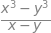

In [42]:
sp.simplify((x**3 - y**3)/(x - y))

In [43]:
sp.collect( x**2 + 2*x*y + y**2 + a*x, x)

$$
(x + y )^3
$$

In [45]:
expr2 = (x + y)**3

In [46]:
sp.expand( expr2 )

In [47]:
sp.factor( expr2 )

In [48]:
sp.simplify( expr2 )

In [49]:
sp.collect( expr2, x )

In [50]:
sp.collect( sp.expand( expr2 ) , x )

$$
 a x^2 + b x^2 + a x - b x + c
$$

In [52]:
sp.collect( a*x**2 + b*x**2 + a*x - b*x + c, x)

### 课堂小练习

1. 定义 $x_1$ 为正实数

2. 令 `expr = (x-1)**3 - (x+1)**3`，分别 `expand` 与 `factor`。

3. 化简 `((x**2 - 1)/(x - 1)) - x`。

4. 用 `collect` 将 `x*a + x**2 + 2*a*x**2` 按 `x` 收集项。

In [5]:
### 你的代码

from sympy import symbols, expand, factor, simplify, collect

x, a = symbols('x a')

expr = (x - 1)**3 - (x + 1)**3
expanded = expand(expr)
factored = factor(expr)
print("问题2 expand 结果：", expanded)
print("问题2 factor 结果：", factored)

expr3 = ((x**2 - 1)/(x - 1)) - x
simplified3 = simplify(expr3)
print("问题3 化简结果：", simplified3)

expr4 = x*a + x**2 + 2*a*x**2
collected4 = collect(expr4, x)
print("问题4 收集项结果：", collected4)

问题2 expand 结果： -6*x**2 - 2
问题2 factor 结果： -2*(3*x**2 + 1)
问题3 化简结果： 1
问题4 收集项结果： a*x + x**2*(2*a + 1)


---
## 2. 代入与数值化

### 2.1 代入： `.subs` 用于把表达式里的“子表达式/符号/函数调用”替换为新的对象（数、符号、表达式）。
常见形式：
- `expr.subs(old, new)`：把 `old` 替换为 `new`
- `expr.subs({old1: new1, old2: new2, ...})`：**同时替换**多个目标（字典）
- `expr.subs([(old1, new1), (old2, new2), ...])`：**按顺序依次**替换（列表）

$$
 \frac{ \sin x + \cos x }{x}
$$

In [57]:
func = (sp.sin(x) + sp.cos(x)) / x
func

In [58]:
func.subs( x, 1 )

In [59]:
f_sub = func.subs( {x: sp.pi/4} )
f_sub

In [60]:
func.subs( x, y )  ## 把 x 换成 y

In [61]:
func.subs( sp.sin(x), a )         # 把 sin(x) 替换为 a

In [62]:
# 把 sin(x) 替换为 a, cos(x) 替换为 b
func.subs( [ (sp.sin(x), a ), (sp.cos(x), b ) ] )

In [63]:
# 把 sin(x) 替换为 a, cos(x) 替换为 b
func.subs( {sp.sin(x): a , sp.cos(x): b } )

$$
 (x + y)^2
$$

In [65]:
expr = (x + y)**2
expr

In [66]:
expr_num = expr.subs( {x:2, y:3} )
expr_num

In [67]:
expr_num = expr.subs( {x:2,} )
expr_num

### 2.2 数值化：`.evalf()` 

- **`.evalf()`**：在 **SymPy 符号对象** 上进行**高精度数值求值**（BigFloat），返回仍是 SymPy 数字类型。  

| 参数     | 含义                  | 常用取值/示例                     |
| ------ | ------------------- | --------------------------- |
| `n`    | 目标小数位精度（十进制位）       | `expr.evalf(50)`            |
| `subs` | 先替换再数值化（字典或列表）      | `expr.evalf(subs={x: 0.1})` |
| `chop` | 把非常小的数裁剪为 0（去掉数值噪声） | `expr.evalf(chop=True)`     |


In [69]:
#f_sub.evalf?
#sp.N?

In [70]:
f_sub.evalf(n=9)

In [71]:
val = (sp.sin(x)/x).subs(x, sp.pi/6).evalf(10)
val


### 2.3 生成可调用函数：`lambdify`

`sp.lambdify( args, expr, modules=None )`


| 参数        | 含义              | 常用取值/示例                                                                           |
| --------- | --------------- | --------------------------------------------------------------------------------- |
| `args`    | 自变量（一个符号或符号元组）  | `x`、`(x, y)`                                                                      |
| `expr`    | 符号表达式           | `sp.sin(x)/x`                                                                     |
| `modules` | 计算后端/映射         | `'numpy'`（数组/绘图常用），`'math'`（标量），`'mpmath'`（高精度），也可 `['numpy', {'sqrt': np.sqrt}]` |


In [73]:
#sp.lambdify?

In [74]:
f_num = sp.lambdify(x, func, 'numpy')  # 数值函数（可用于绘图/数组）
f_num

<function _lambdifygenerated(x)>

In [75]:
f_num( 3.1415/4 ) 

In [76]:
import numpy as np
f_num( np.arange(1, 3, 0.1 ) )

array([ 1.38177329,  1.22254862,  1.07866403,  0.94696693,  0.82529777,
        0.71215479,  0.6064838 ,  0.50754136,  0.41480308,  0.32790027,
        0.2465753 ,  0.17064917,  0.09999786,  0.03453443, -0.02580439,
       -0.08106859, -0.13130284, -0.17655269, -0.21686935, -0.25231339])

In [77]:
f_scp = sp.lambdify(x, func, 'scipy')  # 数值函数（可用于绘图/数组）
f_scp

<function _lambdifygenerated(x)>

In [78]:
f_scp( 3.1415/4 )

### 课堂练习

1. 令 `g = sp.exp(-x**2)`, 代入 `x=1/2` 并取 `6` 位有效数字 (提示：用`.evalf(n=6)`)。

2. 用 `lambdify` 把 `sin(x)/x` 转为数值函数，取 `x` 为 `np.linspace(0.1,5,100)` 求值。

***常见坑***

在 `x=0` 处 `sin(x)/x` 的极限为 `1`，但直接代入会报错/为 `0/NaN`。需用极限再处理。

In [8]:
## 你的代码
import sympy as sp
import numpy as np

x = sp.symbols('x')
g = sp.exp(-x**2)
x_val = 1/2  # 代入x=1/2
g_result = g.subs(x, x_val).evalf(n=6)
print("问题1结果：", g_result)

f = sp.sin(x)/x

f_numeric = sp.lambdify(x, f, 'numpy')

x_array = np.linspace(0.1, 5, 100)
f_values = f_numeric(x_array)
print("问题2函数值（前5个示例）：", f_values[:5])



问题1结果： 0.778801
问题2函数值（前5个示例）： [0.99833417 0.99627937 0.99341356 0.98974094 0.9852669 ]


In [81]:
func2 = sp.sin(x) / x
func2

In [82]:
func2.subs( {x:0 } )

In [83]:
sp.limit( func2, x, 0 ) 

---

## 3. 方程与求解

***注意你声明变量：如果是整数则解只有正数解；如果是实数，则有实数解***

### 3.1 方程对象：`sp.Eq(lhs, rhs)`
- `sp.Eq(lhs, rhs)` 表示 `lhs = rhs` 的方程对象
- `sp.Eq(expr)` 等价于 `sp.Eq(expr, 0)`，常用于写成 `expr=0`的形式

In [85]:
x = sp.symbols('x', positive=True, real=True)

In [86]:
sp.Eq( 1, 0 )

In [87]:
eq = sp.Eq( x**2 - 2, 0)

- 代数方程：`sp.solve(eq, var)` 或 `sp.solveset(eq, var, domain)`

In [89]:
sp.solve(eq, x)

In [90]:
x = sp.symbols('x', real=True)

In [91]:
eq = sp.Eq( x**2 - 2, 0)
sp.solve(eq, x)

In [92]:
y = sp.symbols('y', real=True)

### 3.2 多元方程组：`sp.solve([eq1, eq2], (x, y))`
- `solve`：返回字典或列表，适合代数问题的快速求解。
- `solveset`：集合语义、对实/复域更严格；用法：sp.solveset(sp.Eq(...), x, sp.S.Reals)。(本课不做具体讲解)

In [94]:
sp.solve([sp.Eq(x + y, 3), sp.Eq(x - y, 1)], (x, y))

In [95]:
eq1 = sp.Eq(x + y, 3)
eq2 = sp.Eq(x - y, 1)

sp.solve([ eq1, eq2 ], (x, y))

In [96]:
eq1 = sp.Eq(x + y + z, 3)
eq2 = sp.Eq(x - y + 2 *z, 4)
eq3 = sp.Eq(x - 2* y - z, 1)

solutioin3 = sp.solve([ eq1, eq2, eq3 ], (x, y, z))

In [97]:
solutioin3

In [98]:
solutioin3[x], solutioin3[y], solutioin3[z]

In [99]:
solutioin3[x] == 2

True

自动化简与 `evaluate=False`

- `Eq` 会尝试简单化简：若左右两边明显相等，可能直接返回 `True/False`。
- 希望保留“方程形状”，可用 `evaluate=False`。

In [101]:
# 这个会直接给出 True（恒等式）
sp.Eq(sp.sin(x)**2 + sp.cos(x)**2, 1)

In [102]:
sp.Eq( sp.simplify( sp.sin(x)**2 + sp.cos(x)**2 ), 1)

In [103]:
# 强制保留为等式对象
sp.Eq(sp.sin(x)**2 + sp.cos(x)**2, 1, evaluate=False)

- 代入与真假判定: `Eq` 是对象，你可以像处理表达式那样 `subs` 代入，再看它是否变成可判定的 `True/False`：

In [105]:
eq = sp.Eq(x**2, 4)

eq.subs(x, 2) 

In [106]:
eq.subs(x, -2)

In [107]:
eq.subs(x, 3)

### 课堂练习

1. 解 $x^3 - 1 = 0$（复数根也要）。

2. 解方程组：{ $2 x + y = 5$, $x - 3y = -1$ }。

3. 解参数方程：$a x^2 - 1 = 0$，讨论 $a>0$ 与 $a=0$ 的不同。

In [11]:
## 你的代码
from sympy import symbols, solve, Eq

x = symbols('x')
eq1 = Eq(x**3 - 1, 0)
solutions1 = solve(eq1, x)
print("问题1的解：", solutions1)


x, y = symbols('x y')
eq2_1 = Eq(2*x + y, 5)
eq2_2 = Eq(x - 3*y, -1)
solutions2 = solve((eq2_1, eq2_2), (x, y))
print("问题2的解：", solutions2)


x, a = symbols('x a')
eq3 = Eq(a*x**2 - 1, 0)

# 情况1：a > 0
solutions3_a_positive = solve(eq3.subs(a, 1), x)  # 代入a>0的示例（如a=1），实际解为x=±1/√a
print("当a > 0时，解为：", [sol.subs(a, symbols('a')) for sol in solutions3_a_positive])

# 情况2：a = 0
eq3_a_zero = eq3.subs(a, 0)
solutions3_a_zero = solve(eq3_a_zero, x)
print("当a = 0时，解为：", solutions3_a_zero)


问题1的解： [1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]
问题2的解： {x: 2, y: 1}
当a > 0时，解为： [-1, 1]
当a = 0时，解为： []


In [110]:
x = sp.symbols('x', real=True)
a = sp.symbols('a', positive=True, real=True)  # 声明 a>0

eq = sp.Eq(a*x**2 - 1, 0)
sp.solveset(eq, x, domain=sp.S.Reals)

In [111]:
#a = sp.symbols('a', negative=True, real=True )
a = 0
eq4 = sp.Eq(a * x**2 - 1, 0,  domain=sp.S.Reals)

sp.solve(eq4, x)

In [112]:
#a = sp.symbols('a', positive=False, real=True )
a = sp.symbols('a', negative=True, real=True )

sp.solve(sp.Eq( a*x**2 - 1, 0), x, domain=sp.S.Reals)
# 结果：{ -I/sqrt(-a_neg), I/sqrt(-a_neg) }

In [113]:
#a = sp.symbols('a', positive=False, real=True )
a_neg = sp.symbols('a_neg', negative=True, real=True )

sp.solveset(sp.Eq( a_neg * x**2 - 1, 0), x, domain= sp.S.Complexes)

In [114]:
i = sp.Symbol('i', imaginary=True)
sp.solveset( sp.Eq(i**2 + i*sp.sin(i), 1), i, domain= sp.S.Reals)

In [115]:
#sp.solveset?

---

## 4. 微积分

### 4.1 微分 `sp.diff` 用于对符号表达式做求导（常微分/偏导/高阶导）。  
基本签名：
- `sp.diff(expr, x)`：对 `x` 求一阶导  
- `sp.diff(expr, x, n)` 或 `sp.diff(expr, (x, n))`：对 `x` 求 n 阶导  
- `sp.diff(expr, x, y)`：先对 `x` 求一阶导，再对 `y` 求一阶导（混合偏导）  
- `sp.diff(expr, (x, n), (y, m))`：对 `x` 连续 n 阶，再对 `y` 连续 m 阶

$$
e^{x^{2}} \sin{\left(x \right)}
$$

In [118]:
f = sp.sin(x) * sp.exp(x**2)
sp.diff(f, x) # 一阶导


$$
 \frac{ d \sin x }{ d x }
$$

In [120]:
sp.diff(sp.sin(x), x)

$$
 \frac{d^2 (x^4 + x^2) }{ d x^2 }
$$

In [122]:
sp.diff( x**4 + x**2, x, 2)   # 二阶导

$$
 \frac{\partial^4 \sin x \cos y}{\partial x^2 \ \partial y^2 }
$$

In [124]:
sp.diff( sp.sin(x) * sp.cos(y), x, 2, y, 2)

In [125]:
sp.diff( sp.sin(x) * sp.cos(y), (x, 2), (y, 2) )

In [126]:
# 偏导与混合偏导
g = sp.exp(x*y) + x**2*y
sp.diff(g, x, y)         # ∂^2 g / (∂y ∂x)，先对 x 后对 y

#### 在点处求导数值: 先求导，再 subs 代入点，或用 lambdify 生成数值函数。

In [128]:
dfdx = sp.diff(sp.sin(x)/x, x)      # 导函数
dfdx_at_1 = dfdx.subs(x, 1).evalf() # 在 x=1 的数值
dfdx_at_1

In [129]:
## 
dfdx_num = sp.lambdify(x, dfdx, 'numpy')
dfdx_num(1)

### 4.2 积分 `sp.integrate`
- 不定积分：`sp.integrate(f, x)` 返回关于 `x` 的原函数（省略常数 C）。  
- 定积分：`sp.integrate(f, (x, a, b))` 计算从 `a` 到 `b` 的定积分。  
- 多重积分：`sp.integrate(f, (x, a, b), (y, c, d), ...)` 按从左到右的顺序依次积分。  
- 若无法闭式求解，可能返回**未求值的 `Integral` 对象**。

#### 不定积分

$$
 \int x y d x
$$

In [133]:
sp.integrate( x*y, x)

$$
 \int \log x d x 
$$

In [135]:
sp.integrate( sp.log(x), x )

In [136]:
sp.integrate(x*sp.exp(x), x)

$$
\int e^{c x} d x = \frac{e^{c x}}{c} \quad  \text{for} \quad c \neq 0
$$

In [138]:
c = sp.symbols('c', real=True)

sp.integrate(sp.exp(c*x), x)  

⎧ c⋅x           
⎪ℯ              
⎪────  for c ≠ 0
⎨ c             
⎪               
⎪ x    otherwise
⎩               

#### 定积分

高斯积分
$$
 \int^{\infty}_{-\infty} e^{-x^2} d x = \sqrt{\pi}
$$

In [140]:
sp.integrate( sp.exp(-x**2), (x, -sp.oo, sp.oo))  # 高斯积分

$$
 \int^{\infty}_{0} \frac{\sin x}{x} d x = \frac{\pi}{2}
$$

In [142]:
sp.integrate( sp.sin(x)/x, (x, 0, sp.oo))

$$
 \int^{a}_{1} \log x d x 
$$

In [144]:
sp.integrate( sp.log(x), (x, 1, a))

$$
 \int^{x}_{0} \sqrt{1 + x} d x 
$$

In [146]:
sp.integrate( sp.sqrt(1 + x), (x, 0, x))

In [147]:
# 带参数的定积分（若有条件，适当添加假设提升可化简性）
alpha = sp.symbols('alpha', positive=True)
sp.integrate(sp.exp(-alpha*x), (x, 0, sp.oo))

In [148]:
sp.integrate(1/x, (x, 0, 1)) 

#### 多重积分

In [150]:
# 迭代积分：对 x 后对 y
f = x*sp.cos(y)
sp.integrate(f, (x, 0, 1), (y, 0, sp.pi/2))

In [151]:
# 改变顺序（若合法，结果应一致）
sp.integrate(f, (y, 0, sp.pi/2), (x, 0, 1))

In [152]:
r, theta, R = sp.symbols('r theta R', positive=True)
I_polar = sp.integrate(sp.integrate(sp.exp(-r**2)*r, (r, 0, R)), (theta, 0, 2*sp.pi))
sp.simplify(I_polar)


In [153]:
# 直接对 Integral 对象数值化
Int_hard = sp.Integral(sp.sin(x**2), (x, 0, sp.oo))  # 菲涅耳相关积分
Int_hard.evalf()  # 数值


In [154]:
#sp.integrate?

### 4.3 极限  `sp.limit` 

`sp.limit(表达式, 自变量, point, dir='+')` 用于求符号极限。  
- `point`：极限点（可用 `0`、`1`、`sp.oo`、`-sp.oo` 等）  
- `dir`：方向，`'+'`（右极限，→point⁺），`'-'`（左极限，→point⁻），`'+-'`（双侧；不一致则抛异常或给出信息）

$$
\lim_{x \to 0} \frac{\sin x}{x} = 1
$$

In [157]:
sp.limit(sp.sin(x)/x, x, 0)

$$
  \lim_{x \to \infty} \left(1 + \frac{1}{x}\right)^{x} = e
$$

In [159]:
sp.limit((1 + 1/x)**x, x, sp.oo)

$$
  \lim_{x \to 0^+} \frac{1}{x} = +\infty
$$

In [161]:
sp.limit(1/x, x, 0) # default dir='+'

$$
  \lim_{x \to 0^-} \frac{1}{x} = +\infty
$$

In [163]:
sp.limit(1/x, x, 0, dir="-")

In [164]:
sp.limit(1/x, x, 0, dir='+-') ## 双侧极限不存在

$$
  \lim_{n \to \infty} \left( 1 + \frac{1}{n} \right)^n = e
$$

序列极限（离散 $n \to \infty$）：`limit_seq` 对纯离散序列更稳妥

In [166]:
n = sp.symbols('n', integer=True, positive=True)

sp.limit_seq((1 + 1/n)**n, n)

#### 带参数的极限与“假设”（assumptions）
 带参数时，给出合理假设（如正实）常能让极限计算更稳、更简洁。

In [168]:
a = sp.symbols('a', positive=True, real=True)
expr = (sp.exp(a*x) - 1) / x
sp.limit(expr, x, 0)

In [169]:
# 没有假设时，结果可能更复杂或保持未化简
b = sp.symbols('b', real=True)
sp.limit((sp.exp(b*x) - 1)/x, x, 0)  # 结果依赖于对 b 的理解

震荡项 $ \sin \frac{1}{x} $ 型:

$$
  \lim_{x \to 0} \sin \frac{1}{x}
$$

In [171]:
sp.limit(sp.sin(1/x), x, 0)           # 无极限（介于 -1 与 1 振荡）

In [172]:
sp.limit(x*sp.sin(1/x), x, 0)         # 0（夹逼）

In [173]:
sp.limit(x*sp.log(x), x, 0, dir='+')  # 0 （log(x)-> -∞ 但 x→0 更快）

In [174]:
sp.limit((x - sp.sin(x))/x**3, x, 0)  # 1/6  （隐含“高阶小量”展开）

#### 数值验证：`lambdify + mpmath` 当符号极限给出结果后进行验证

$$
  \lim_{n \to 0} \frac{e^x - 1}{x} = 1
$$

In [177]:
import mpmath as mp

f_num = sp.lambdify(x, (sp.exp(x)-1)/x, 'mpmath')

for k in [1, 2, 3, 4, 5, 6]:
    val = f_num( 10**(-k) )
    print( f'{10**(-k):.1e}, {val}')  # → 接近 1


1.0e-01, 1.05170918075648
1.0e-02, 1.00501670841679
1.0e-03, 1.00050016670838
1.0e-04, 1.00005000166714
1.0e-05, 1.00000500000696
1.0e-06, 1.00000049996218


#### 课堂练习

1. 求
$$
\frac{d (x e^{2 x})}{d x}
$$
2. 计算 积分
$$
\int^\pi_0 \sin x dx
$$
与
$$
\int^1_0 x^2 dx
$$
3. 求极限
$$
\lim_{x \to 0} \frac{1 -\cos x}{x^2}
$$

In [17]:
## 你的代码
from sympy import symbols, diff, integrate, limit,sin, cos, exp

x = symbols('x')


derivative = diff(x * exp(2*x), x)
print("问题1的导数结果：", derivative)


integral1 = integrate(sin(x), (x, 0, np.pi))  
integral2 = integrate(x**2, (x, 0, 1))
print("问题2第一个积分结果：", integral1)
print("问题2第二个积分结果：", integral2)


limit_result = limit((1 - cos(x))/x**2, x, 0)
print("问题3的极限结果：", limit_result)

问题1的导数结果： 2*x*exp(2*x) + exp(2*x)
问题2第一个积分结果： 2.00000000000000
问题2第二个积分结果： 1/3
问题3的极限结果： 1/2


---
## 5. 泰勒级数展开

`sp.series(expr, x, x0, n)` 用于把表达式 `expr` 在点 `x = x0` 附近展开到 **n-1 阶**（含大 O 记号）。  
- `expr`：要展开的表达式  
- `x`：展开变量（必须是 `Symbol`）  
- `x0`：展开中心（可为数、`sp.oo/-sp.oo`、或符号）  
- `n`：展开到的阶数上界（返回含 `O((x-x0)^n)` 的结果）

**返回值**：一个带有 `O(...)` 余项的表达式。若只要多项式部分，可使用 `.removeO()`。

### 5.1 麦克劳林展开（在 0 点的泰勒展开）

In [182]:
sp.series(sp.sin(x)/x, x, 0, 8)    # 到 x^7，含 O(x^8)

In [183]:
sp.series(sp.exp(x), x, 0, 6)       # e^x 的前 5 项

In [184]:
sp.series(sp.log(1+x), x, 0, 6)    # ln(1+x) 的前 5 项

提示：series 默认包含大 O 项，如需纯多项式：

In [186]:
sp.series(sp.sin(x)/x, x, 0, 8).removeO()

### 5.2 一般泰勒展开（在任意点 $x=a$）

In [188]:
a = sp.symbols('a', real=True)
f = sp.cos(x)
sp.series(f, x, a, 5)               # 在 x=a 附近到 (x-a)^4

In [189]:
# 具体 a 的数值（例如 a = pi/3）
sp.series(sp.cos(x), x, sp.pi/3, 5).removeO()

### 5.3 无穷远处的渐近展开

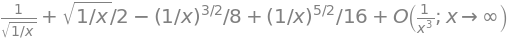

In [191]:
sp.series(sp.sqrt(x + 1), x, sp.oo, 3)      # x→∞ 的展开，含降幂/小参数 1/x


In [192]:
sp.series(sp.log(x + 1), x, sp.oo, 3)       # 渐近展开（按 1/x 的幂）

### 5.4 去掉大 O 项、转换为“可计算多项式” 

In [194]:
ser = sp.series(sp.sin(x)/x, x, 0, 8)  # 含 O(x^8)
poly = ser.removeO()                   # 仅保留多项式部分
poly


In [195]:
# 多项式可直接代值/转数值函数
poly.subs(x, 0.2).evalf()

In [196]:
sp.lambdify(x, poly, 'numpy')(0.2)

### 5.5 用级数辅助极限/判敛

用级数快速求极限
$$
  \lim_{x \to 0} \frac{x - \sin{\left(x \right)}}{x^{3}} = \frac{1}{6}
$$

In [198]:
expr = (x - sp.sin(x)) / x**3
sp.series(expr, x, 0, 2)    # 期望得到 1/6 + O(x^2)

In [199]:
sp.limit(expr, x, 0)        # 1/6

In [200]:
print(sp.latex(expr))

\frac{x - \sin{\left(x \right)}}{x^{3}}


$$
  \frac{\sin x}{x} =  1 - \frac{x^{2}}{3!} + O\left(x^{4}\right) \Rightarrow \lim_{x \to 0} \frac{\sin x}{x} = 1
$$

In [202]:
expr = sp.series(sp.sin(x)/x, x, 0, 4)
expr

### 5.6 多变量函数的逐次展开

`series` 是对单变量的展开。对多元函数可先对一个变量展开，再对另一个变量展开（注意保持“小量”一致性）。
$$
 e^{x y}
$$

In [204]:
y = sp.symbols('y')
F = sp.exp(x*y)              # 例如 e^{xy}

# 先对 x 展开到 x^3
Fx = sp.series(F, x, 0, 4).removeO()

Fx

In [205]:
# 再对 y 展开到 y^3（或只在 y→0 取低阶）
Fxy = sp.series(Fx, y, 0, 4).removeO()
Fxy


### 课堂小练习

1. 展开 $\exp(x)$ 到 $x^5$；比较 $x=0.3$ 的近似误差。

2. 对 $ \cos(x)$ 在 $x=0$ 展开到 $x^6$。

In [19]:
from sympy import symbols, exp, cos, series, evalf

x = symbols('x')


exp_series = series(exp(x), x, 0, 6)  
print("exp(x) 展开到 x^5 的级数：\n", exp_series)

x_val = 0.3
approx_exp = exp_series.subs(x, x_val).evalf()  
actual_exp = exp(x_val).evalf()  
error_exp = abs(actual_exp - approx_exp)
print(f"\nx=0.3 时：\n近似值 = {approx_exp}\n实际值 = {actual_exp}\n近似误差 = {error_exp}")


cos_series = series(cos(x), x, 0, 7)  
print("\ncos(x) 在 x=0 展开到 x^6 的级数：\n", cos_series)

exp(x) 展开到 x^5 的级数：
 1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6)

x=0.3 时：
近似值 = O(1)
实际值 = 1.34985880757600
近似误差 = Abs(O(1))

cos(x) 在 x=0 展开到 x^6 的级数：
 1 - x**2/2 + x**4/24 - x**6/720 + O(x**7)


## 6. 线性代数

- 矩阵：`Matrix`，
- 行列式 `det`，
- 逆 `inv`，
- 解线性方程 `A.LUsolve(b)`，
- 特征值/向量 `eigenvals/eigenvects`

### 6.1. `Matrix`：创建与基本操作

- 创建：`sp.Matrix([...])`（二维列表/元组），或 `sp.Matrix(n, m, lambda i,j: ...)`
- 形状：`.shape` 返回 `(行, 列)`
- 索引：`A[i, j]`（从 0 开始）
- 转置：`A.T`
- 连接：`A.row_join(B)`, `A.col_join(B)`


In [209]:
A = sp.Matrix([[2, 1], [1, 3]])
b = sp.Matrix([5, 7])
A, b

⎛⎡2  1⎤  ⎡5⎤⎞
⎜⎢    ⎥, ⎢ ⎥⎟
⎝⎣1  3⎦  ⎣7⎦⎠

In [210]:
#  直接创建
A = sp.Matrix([[2, 1, 0],
               [1, 3, 1],
               [0, 1, 2]])
A

⎡2  1  0⎤
⎢       ⎥
⎢1  3  1⎥
⎢       ⎥
⎣0  1  2⎦

In [211]:
A.shape

In [212]:
A.T

⎡2  1  0⎤
⎢       ⎥
⎢1  3  1⎥
⎢       ⎥
⎣0  1  2⎦

In [213]:
# 元素访问与修改
A[0, 1], A[1, 1]

In [214]:
#A[0, 1] = 5
#A

In [215]:
m, n = 3, 3
A = sp.Matrix(m, n, lambda i, j: sp.Symbol(f"a{i+1}_{j+1}"))
A

⎡a₁ ₁  a₁ ₂  a₁ ₃⎤
⎢                ⎥
⎢a₂ ₁  a₂ ₂  a₂ ₃⎥
⎢                ⎥
⎣a₃ ₁  a₃ ₂  a₃ ₃⎦

In [216]:
m, n = 3, 3
A = sp.Matrix([[sp.Symbol(f"a{i}_{j}") for j in range(1, n+1)]
                                      for i in range(1, m+1)])
A


⎡a₁ ₁  a₁ ₂  a₁ ₃⎤
⎢                ⎥
⎢a₂ ₁  a₂ ₂  a₂ ₃⎥
⎢                ⎥
⎣a₃ ₁  a₃ ₂  a₃ ₃⎦

In [217]:
# 用构造函数生成（示例：3x3 单位阵 & 以规则生成）
I3 = sp.eye(3)
I3

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [218]:
B  = sp.Matrix(3, 3, lambda i, j: i + j)  # B[i,j] = i+j
B

⎡0  1  2⎤
⎢       ⎥
⎢1  2  3⎥
⎢       ⎥
⎣2  3  4⎦

### 6.2. 行列式：`A.det()` / `sp.det(A)`

- 可逆性：`det(A) ≠ 0` 则可逆
- 数学意义：体积缩放、线性无关性判断

In [220]:
detA = A.det()
detI = I3.det()
detB = sp.det(B)

detA, detI, detB

In [221]:
A.det()

In [222]:
# 符号行列式（带参数）
a = sp.symbols('a', real=True)
C = sp.Matrix([[a, 1],
               [2, a]])
C.det()


### 6.3. 逆矩阵：`A.inv()`（或 `A**-1`）

- 需要 `det(A) ≠ 0`；否则抛出错误
- 数学检查：`A * A.inv() == I`


In [224]:
A_inv = A.inv()
A * A_inv, A_inv * A   # 验证得到单位矩阵

⎛⎡                                    a₁ ₁⋅(a₂ ₂⋅a₃ ₃ - a₂ ₃⋅a₃ ₂)            
⎜⎢────────────────────────────────────────────────────────────────────────────
⎜⎢a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ 
⎜⎢                                                                            
⎜⎢                                    a₂ ₁⋅(a₂ ₂⋅a₃ ₃ - a₂ ₃⋅a₃ ₂)            
⎜⎢────────────────────────────────────────────────────────────────────────────
⎜⎢a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ 
⎜⎢                                                                            
⎜⎢                                    a₃ ₁⋅(a₂ ₂⋅a₃ ₃ - a₂ ₃⋅a₃ ₂)            
⎜⎢────────────────────────────────────────────────────────────────────────────
⎝⎣a₁ ₁⋅a₂ ₂⋅a₃ ₃ - a₁ ₁⋅a₂ ₃⋅a₃ ₂ - a₁ ₂⋅a₂ ₁⋅a₃ ₃ + a₁ ₂⋅a₂ ₃⋅a₃ ₁ + a₁ ₃⋅a₂ 

                                                             a₁ ₂⋅(-a₂ ₁⋅a₃ ₃ 
─────────────────────── + ─────────────────────────

In [225]:
# 奇异矩阵的处理：判断后再求逆，避免异常
S = sp.Matrix([[1, 2],
               [2, 4]])  # 行列式为 0
S.det()  # = 0


In [226]:
#S.inv()  # 会报错：Matrix det == 0，无法求逆

### 6.4. 解线性方程：`A.LUsolve(b)`

- 解线性方程组：`A * x = b`
- 要求 A 可逆；若奇异，考虑 `A.gauss_jordan_solve(b)` 或最小二乘（`A.LUsolve` 仅方阵可逆时工作）


In [228]:
A = sp.Matrix([[2, 1, 0],
               [1, 3, 1],
               [0, 1, 2]])
b = sp.Matrix([5, 10, 7])


In [229]:
x = A.LUsolve(b)     # 通过 LU 分解求解
x

⎡3/2⎤
⎢   ⎥
⎢ 2 ⎥
⎢   ⎥
⎣5/2⎦

In [230]:

x = A.LUsolve(b)     # 通过 LU 分解求解
x

⎡3/2⎤
⎢   ⎥
⎢ 2 ⎥
⎢   ⎥
⎣5/2⎦

In [231]:
# 符号右端也可
alpha, beta, gamma = sp.symbols('alpha beta gamma')
b_sym = sp.Matrix([alpha, beta, gamma])
x_sym = A.LUsolve(b_sym)
x_sym


⎡5⋅α   β   γ⎤
⎢─── - ─ + ─⎥
⎢ 8    4   8⎥
⎢           ⎥
⎢  α   β   γ⎥
⎢- ─ + ─ - ─⎥
⎢  4   2   4⎥
⎢           ⎥
⎢α   β   5⋅γ⎥
⎢─ - ─ + ───⎥
⎣8   4    8 ⎦

### 6.5. 特征值与特征向量：`eigenvals()` / `eigenvects()`

- `eigenvals()`：返回字典 `{λ: algebraic_multiplicity}`
- `eigenvects()`：返回列表，每项 `(\lambda, 多重度, [特征向量列表])`
- 若需要数值化：`.evalf()`；若可能出现复根，可用 `A.eigenvects()` 直接给出复特征对


In [233]:
A = sp.Matrix([[2, 1, 0],
               [1, 3, 1],
               [0, 1, 2]])

eigs_vals  = A.eigenvals(multiple=True)
eigs_vals

In [234]:
eigs_vals  = A.eigenvals()
eigs_vals

In [235]:
eigs_vects = A.eigenvects( multiple=True )
eigs_vects

⎡⎛      ⎡⎡1 ⎤⎤⎞  ⎛      ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎢⎜1, 1, ⎢⎢-1⎥⎥⎟, ⎜2, 1, ⎢⎢0 ⎥⎥⎟, ⎜4, 1, ⎢⎢2⎥⎥⎟⎥
⎢⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

In [236]:
eigs_vects[0]

⎛      ⎡⎡1 ⎤⎤⎞
⎜      ⎢⎢  ⎥⎥⎟
⎜1, 1, ⎢⎢-1⎥⎥⎟
⎜      ⎢⎢  ⎥⎥⎟
⎝      ⎣⎣1 ⎦⎦⎠

取一个特征值与对应向量，验证 
$$
A v = \lambda v
$$

In [238]:
lam, mult, vects = eigs_vects[0]
v = vects[0]
A*v, lam*v

⎛⎡1 ⎤  ⎡1 ⎤⎞
⎜⎢  ⎥  ⎢  ⎥⎟
⎜⎢-1⎥, ⎢-1⎥⎟
⎜⎢  ⎥  ⎢  ⎥⎟
⎝⎣1 ⎦  ⎣1 ⎦⎠

In [239]:
# 数值矩阵的特征对（可能出现无理数/复数，使用 evalf 展示更清晰）
A_num = sp.Matrix([[1, 2],
                   [-1, 4]])
A_num.eigenvects()


⎡⎛      ⎡⎡2⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜2, 1, ⎢⎢ ⎥⎥⎟, ⎜3, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

In [240]:
## 代数重数 = 2，几何重数 = 2（可对角化）
A = sp.Matrix([[3,0],[0,3]])
A.eigenvects()

⎡⎛      ⎡⎡1⎤  ⎡0⎤⎤⎞⎤
⎢⎜3, 2, ⎢⎢ ⎥, ⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦  ⎣1⎦⎦⎠⎦

In [241]:
## 代数重数 = 2，几何重数 = 1（缺陷矩阵）
B = sp.Matrix([[3,1],[0,3]])
B.eigenvects()

⎡⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜3, 2, ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦⎦⎠⎦

### 6.6. 常用补充：秩 / 逆的替代 / 化简

- 秩：`A.rank()`（线性无关性、解空间维数）
- 伴随矩阵：`A.adjugate()`（理论用处较多）
- 化简：`A.rref()` 行最简阶梯形（返回 `(R, pivots)`）


In [243]:
A.rank()

In [244]:
A.adjugate()

⎡3  0⎤
⎢    ⎥
⎣0  3⎦

In [245]:
A.rref()

⎛⎡1  0⎤        ⎞
⎜⎢    ⎥, (0, 1)⎟
⎝⎣0  1⎦        ⎠

### 6.7. 典型“坑”与建议

1. **奇异矩阵不可逆**：先用 `A.det()` 或 `A.rank()` 检查；不可逆时用 `rref` 分析解空间，或最小二乘（非方阵/超定）。  
2. **精确 vs 数值**：SymPy 默认**精确代数**（有理数、根号、符号），需要近似请 `.evalf()`。  
3. **特征向量归一化**：`eigenvects()` 返回的向量**不一定归一化**，可用 `.normalized()`。  
4. **性能**：大规模数值线代更适合 NumPy/SciPy；SymPy 用于**符号**推导与**精确**运算。  


### 课堂小练习

1. 求矩阵 $[[1,2],[3,4]]$ 的逆与特征值。

2. 解线性方程组 $[[2,1],[1,3]] * [x,y]^T = [5,7]^T$ 并验证。

3. 设  
   $$
   A=\begin{bmatrix}3&1&1\\1&3&1\\1&1&3\end{bmatrix},\quad
   b=\begin{bmatrix}5\\5\\5\end{bmatrix}.
   $$
   计算 `det(A)`、`A.inv()`、解 `A x = b` 并验证。  
4. 对矩阵  
   $$
   B=\begin{bmatrix}0&-1\\1&0\end{bmatrix},
   $$
   求 `eigenvals/eigenvects`，并解释为什么特征值为纯虚数（几何意义：平面旋转）。  


***常见坑***: 奇异矩阵不可逆；用 `A.rank()` 与 `A.det()` 检查可解性。 

In [249]:
## 你的代码

#A.eigenvects?

---
## 7. 单位与量纲
SymPy 物理单位系统：`sympy.physics.units` 入门

核心思路：**让“单位”参与计算**。把数值和单位一起写进表达式，借助 `convert_to` 做单位换算，利用维度系统避免“裸数”错误。


In [251]:
# 常用单位与换算工具
from sympy.physics.units import (
    meter, second, kilogram, ampere, kelvin, mole, candela,  # SI 基本单位
    newton, joule, watt, pascal, volt, ohm, coulomb, tesla, hertz, radian, degree,
    gram, centimeter, kilometer, hour, minute, milli, kilo, micro, nano
)
from sympy.physics.units import convert_to

### 7.1 基本用法：单位参与“代数表达 + 代入 + 换算”

小贴士：`convert_to(expr, target_unit_or_tuple)` 是最常用的换算接口。目标可以是单个单位或单位元组（比如 (`meter`, `second`) 指导换算优先选择 m、s 的组合）

In [253]:
# 位移、时间、速度
s = 500 * meter
t = 40 * second
v = s/t                         # 速度 with 单位
v, convert_to(v, kilometer/hour)  # 转 km/h


In [254]:
# 力、功、功率：E = F * s,  P = E / t
F = 20*newton
E = F * s                         # 单位会自动合成为 J
P = E / t                         # → Watt
E_simplified = convert_to(E, joule)
P_simplified = convert_to(P, watt)
E, E_simplified, P, P_simplified


### 7.2 国际单位制前缀与复合单位

In [256]:
# SI 前缀：kilo, milli, micro, nano 等
d1 = 3.2 * milli * meter         # 3.2 mm
d1

In [257]:
convert_to(d1, kilometer)

In [258]:
# 压强 = 力 / 面积
A = (2*centimeter) * (3*centimeter)
p = F / A                      # → Pascal 的组合
convert_to(p, pascal)


### 7.3 典型物理模型：把公式写成“带单位的等式”
重力势能 $ E=mgh $

In [260]:
m, h, g = sp.symbols('m h g', positive=True)

In [261]:
g_val = 9.8 * meter/second**2
g_val

In [262]:
E = m * g_val * h
E

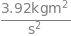

In [263]:
E_val = E.subs({m: 0.2*kilogram, h: 2*meter})
E_val

In [264]:
convert_to(E_val, joule)

### 角度与三角函数（度↔弧度）

In [266]:
theta = 30*degree
convert_to(theta, radian)    # 换成弧度（π/6）

In [267]:
convert_to(theta, radian).n()    # 换成弧度（π/6）

### 课堂小练习

1. 写出动能 $K = \frac{1}{2} m v^2$, 并代入 $m=0.1$ kg, $v=3$ m/s 转换到 `J`。

2. 写出功率 $P=W/t$ 并代入 $W=500$ J, $t=20$ s 转换到 `W`。


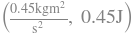

In [522]:
## 你的代码

mass = 0.1 * kilogram
vel = 3 * meter / second

K = 1/2 * mass * vel**2

K,convert_to(K,joule)

In [524]:
W = 500 * joule
t = 20 * second

P = W/t
P,convert_to(P,watt)

---
## 8. 绘图（快速可视化）
`SymPy` 自带简易 `plot` (更推荐 `lambdify+matplotlib`)


In [271]:
# 常用入口（也可 sp.plotting.plot ...）
from sympy.plotting import (
    plot,              # 2D y=f(x)
    plot_parametric,   # 2D 参数曲线 (x(t), y(t))
    plot_implicit,     # 2D 隐式曲线 F(x,y)=0 或 不等式
    plot3d,            # 3D 曲面 z=f(x,y)
    plot3d_parametric_line,
    plot3d_parametric_surface
)

from sympy import sin, cos, exp, pi, Eq


In [272]:
x, y, t = sp.symbols('x y t', real=True)

### 8.1 2D plot

常用参数（传给 plot）

- 区间：(x, xmin, xmax)

- 标题/坐标轴名：title=, xlabel=, ylabel=

- 颜色：line_color='red'（或 RGB 元组/callable）

- 图例：legend=True（各条曲线可用 label='...'）

- 采样：adaptive=True/False, nb_of_points=400（禁自适应时需要调大点数）

- 极点检测（分段中断曲线）：detect_poles=True

In [274]:
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [275]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

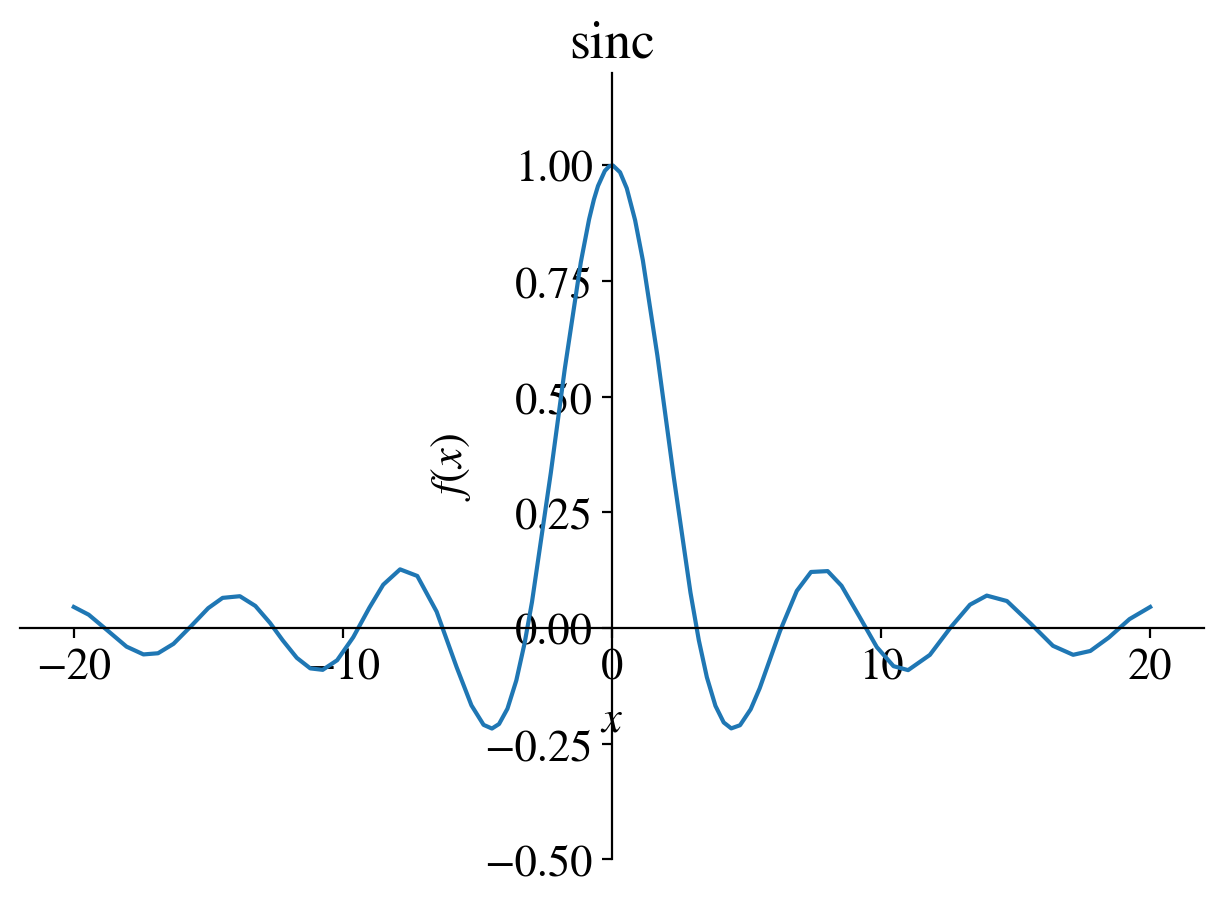

In [526]:
sp.plot( sp.sin(x)/x, (x, -20, 20), ylim=(-0.5, 1.2), title='sinc')

```python
import numpy as np
import matplotlib.pyplot as plt

f = sp.lambdify(x, sp.sin(x)/x, 'numpy')
xx = np.linspace(0.1, 10, 400)
plt.plot(xx, f(xx))
plt.grid(True)
plt.title('sinc')
plt.show()
```

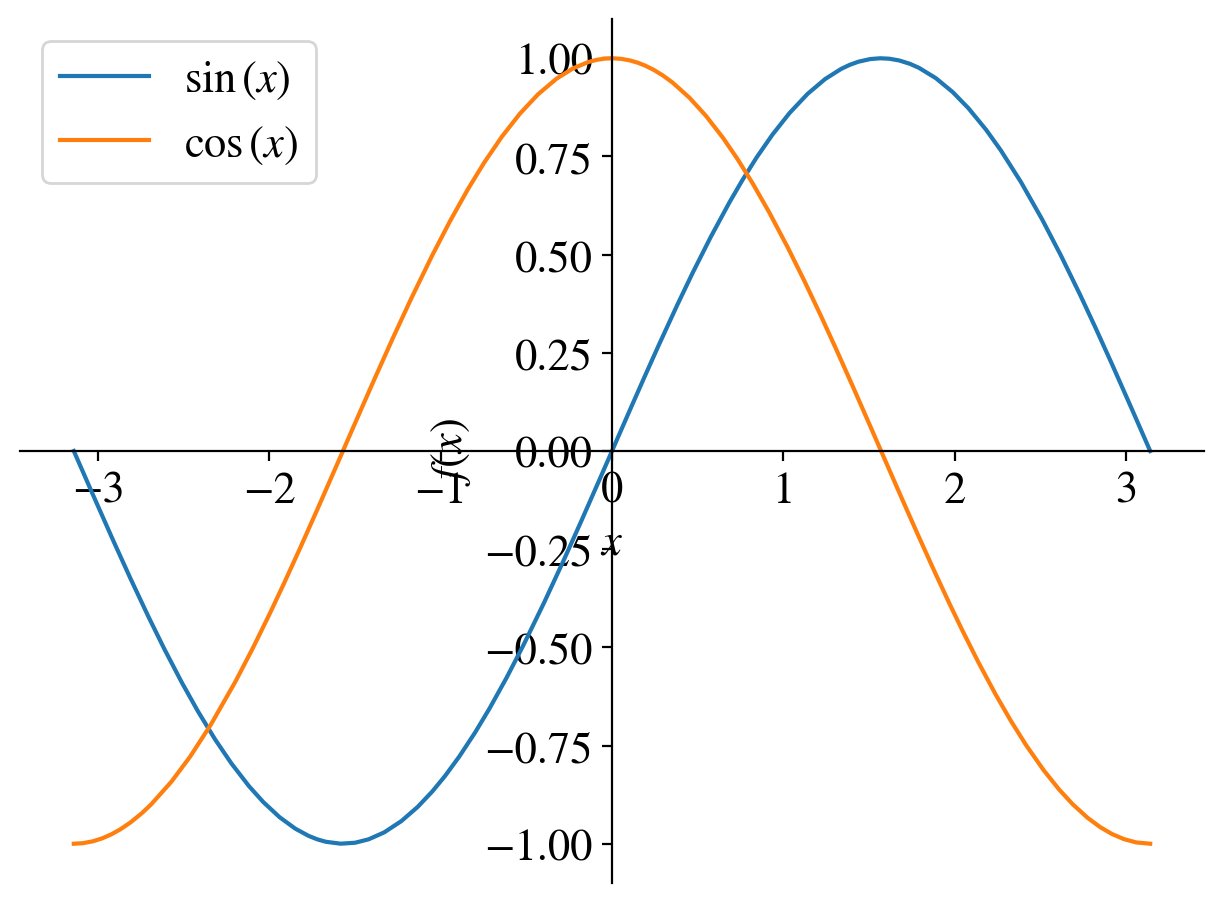

In [278]:
# 多曲线（在一个图里）
plot( sin(x), cos(x), (x, - pi, pi), legend=True)

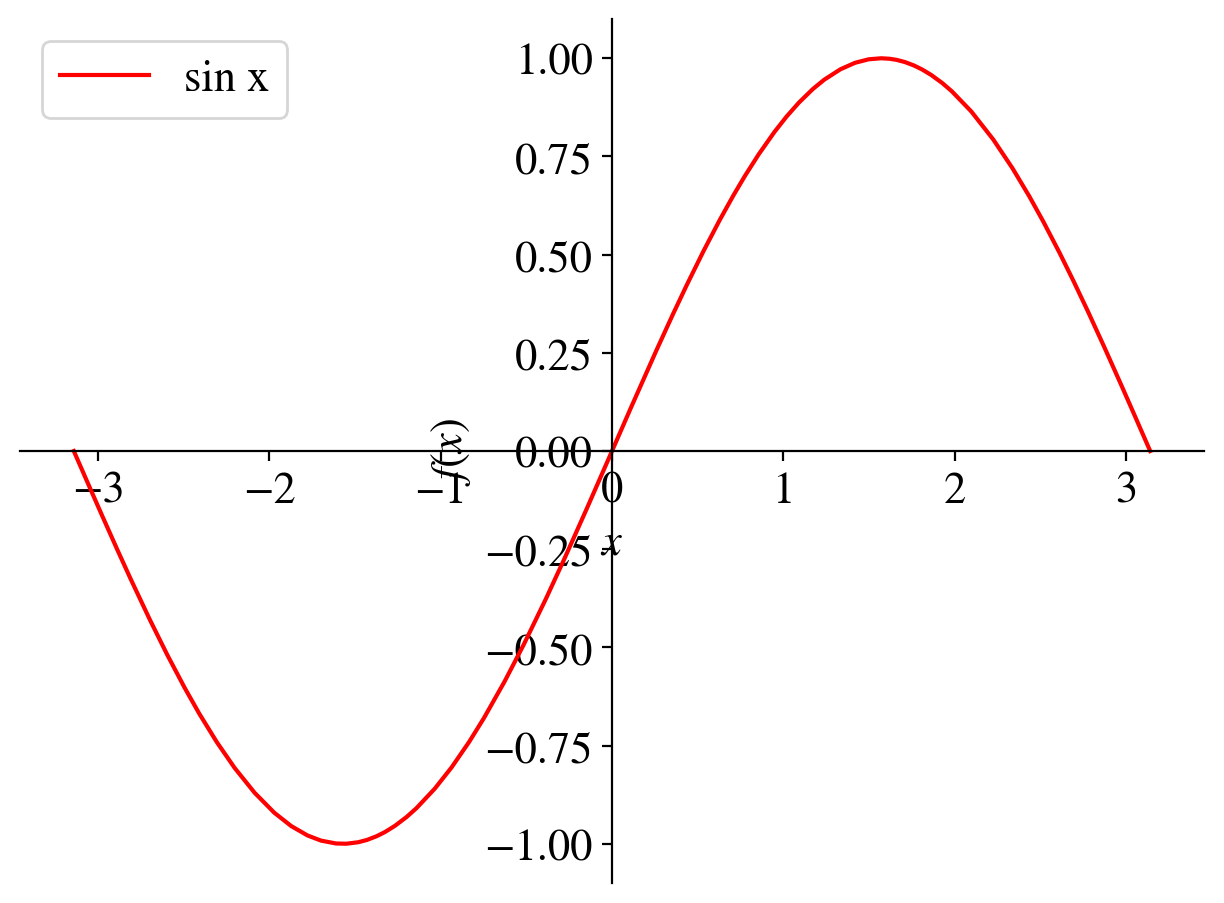

In [279]:
# 自定义颜色/标签
plot(sin(x), (x, -pi, pi), line_color='red', label='sin x', legend=True)

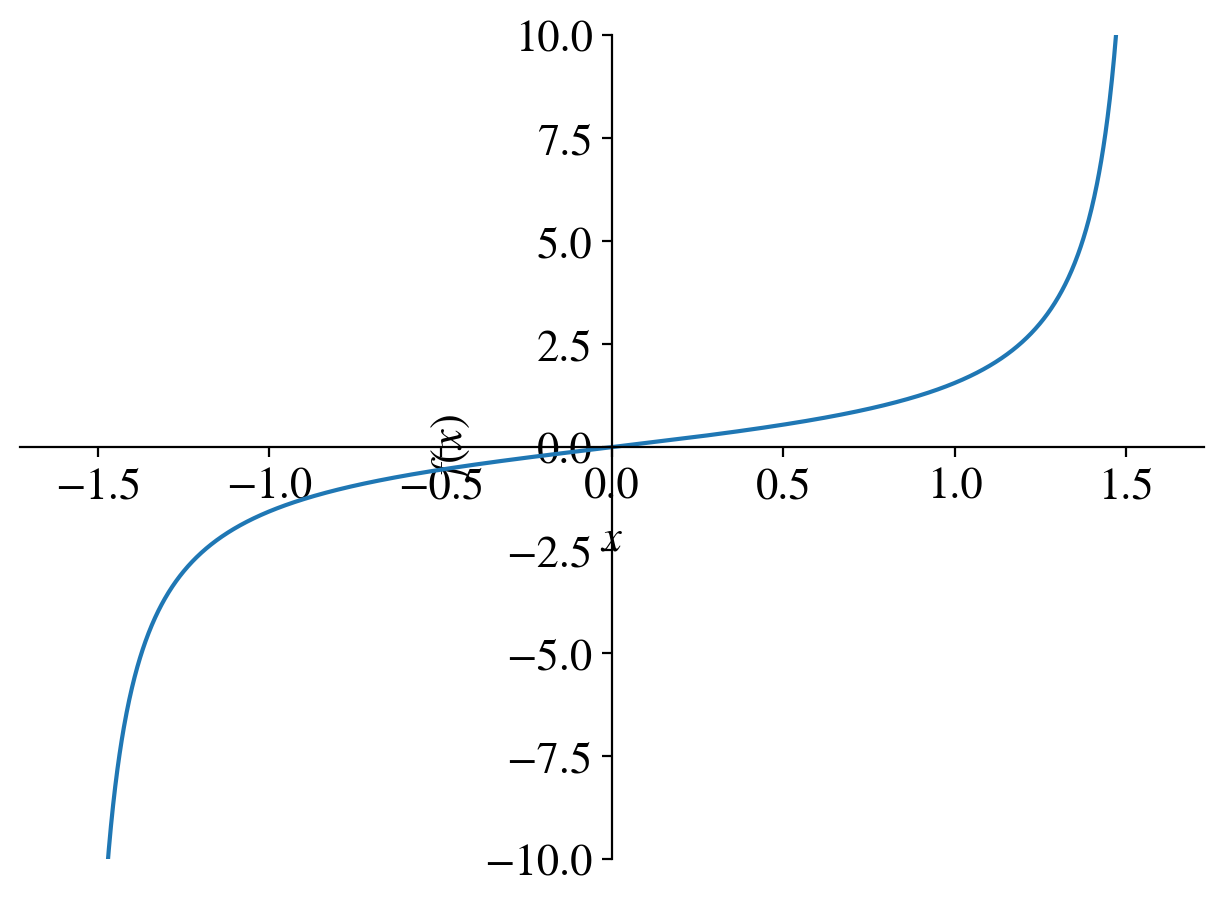

In [280]:
# 更细采样（禁自适应）避免锯齿；检测极点避免“穿越无穷”
plot(sp.tan(x), (x, -pi/2, pi/2), adaptive=False, nb_of_points=2000, detect_poles=True, ylim=(-10, 10))


### 8.2 2D 参数曲线：`plot_parametric`

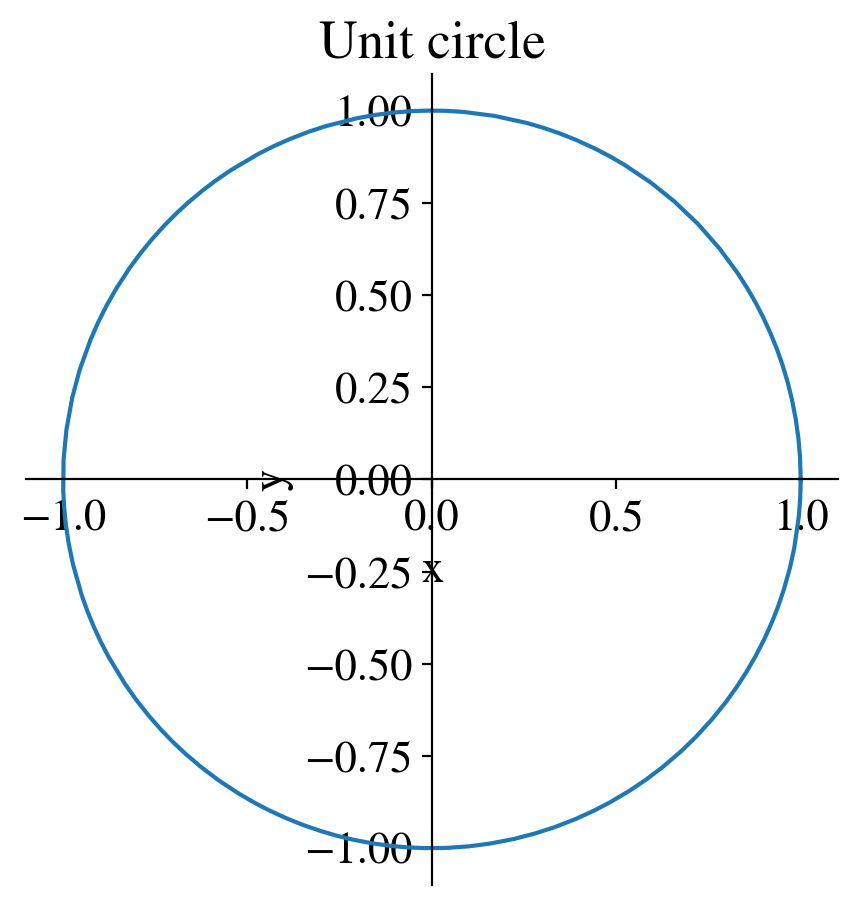

In [282]:
# 圆：x=cos t, y=sin t
plot_parametric(cos(t), sin(t), (t, 0, 2*pi),  xlabel='x', ylabel='y',
                aspect_ratio=(1,1),
                title='Unit circle')


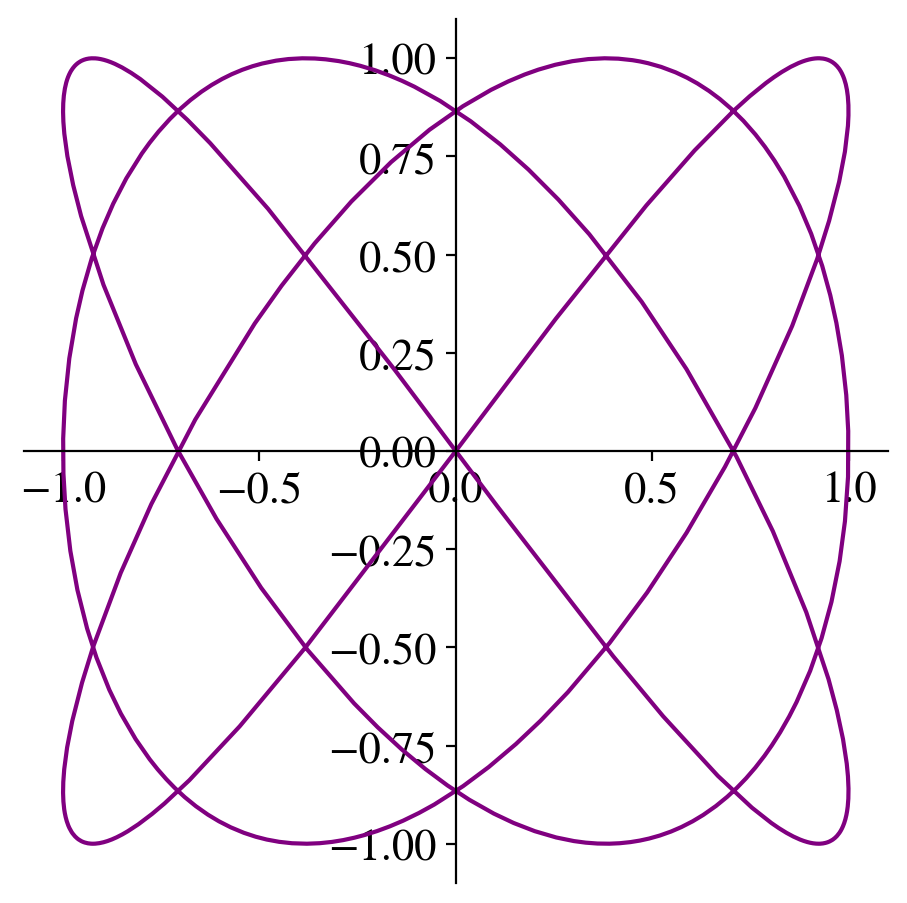

In [283]:
# 李萨如曲线
plot_parametric(sp.sin(3*t), sp.sin(4*t), (t, 0, 2*pi), 
                aspect_ratio=(1,1),
                line_color='purple')

### 8.3 2D 隐式曲线：plot_implicit

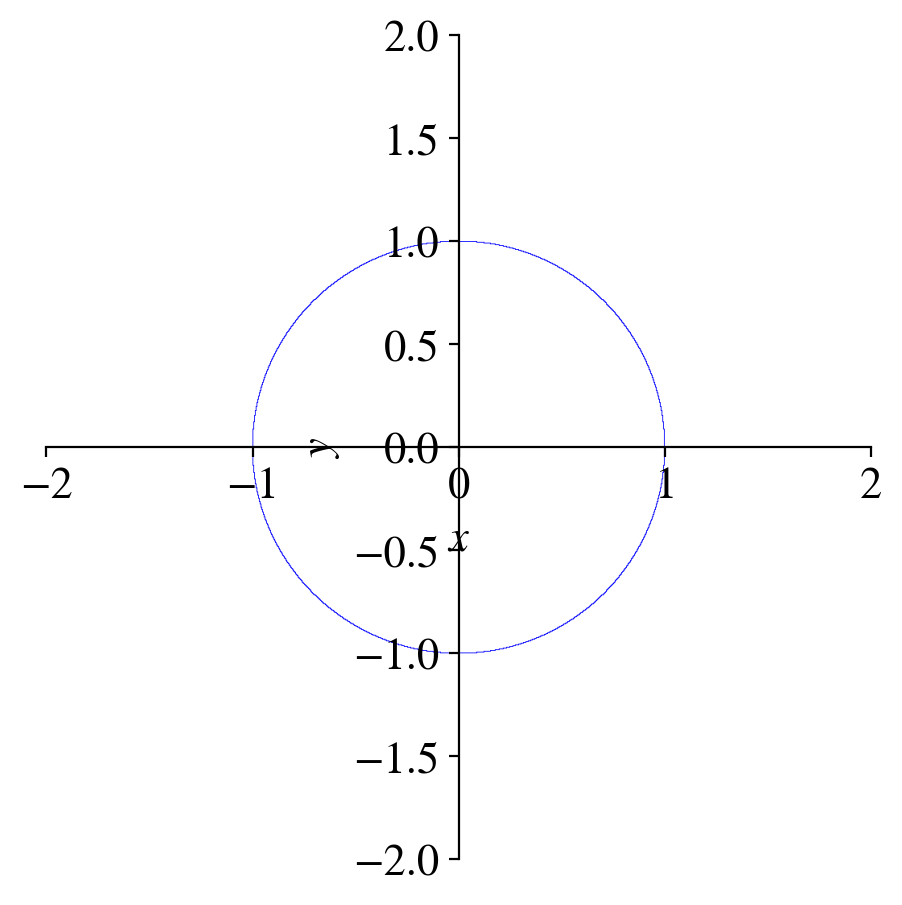

In [532]:
# 圆 x^2 + y^2 = 1
plot_implicit(Eq(x**2 + y**2, 1), (x, -2, 2), (y, -2, 2), 
              aspect_ratio=(1,1) )


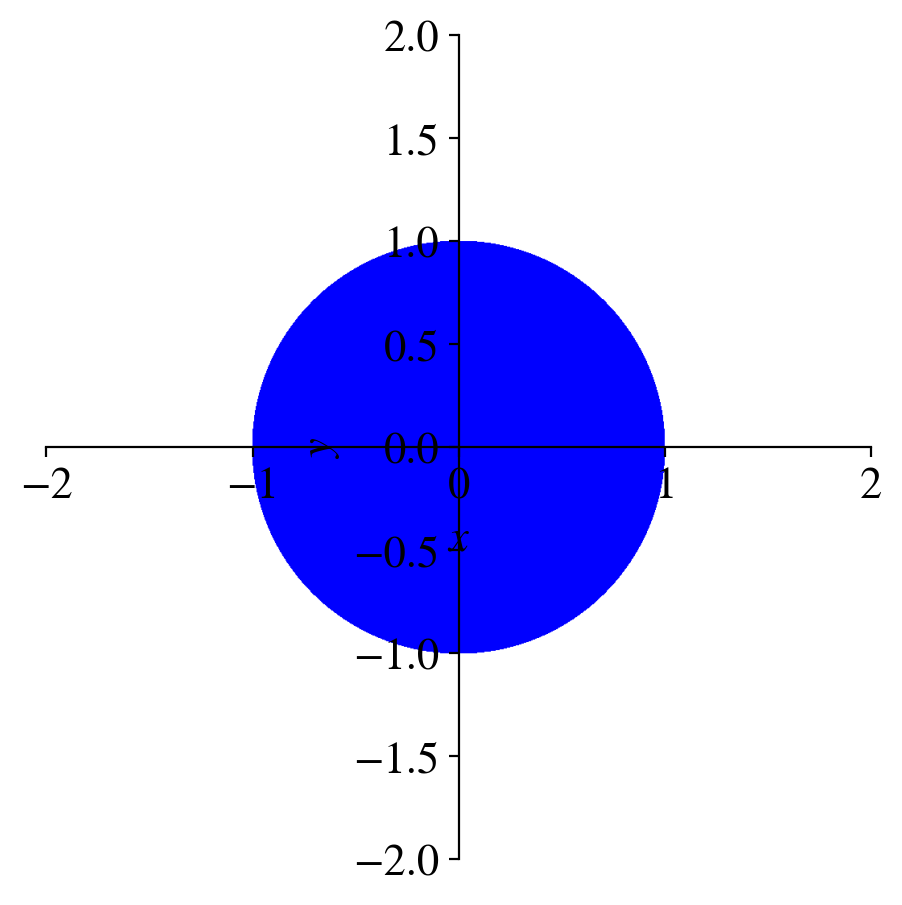

In [286]:
# 不等式区域（如 x^2 + y^2 <= 1）
plot_implicit(x**2 + y**2 - 1 <= 0, (x, -2, 2), (y, -2, 2),
              aspect_ratio=(1,1) )

### 8.4 3D 曲面：plot3d

常用参数

- 区间：`(x, xmin, xmax)`, `(y, ymin, ymax)`

- 采样：`nb_of_points_x=50`, `nb_of_points_y=50`（视情况调大）

- 着色：`surface_color=lambda X, Y, Z: Z`（按高度着色）

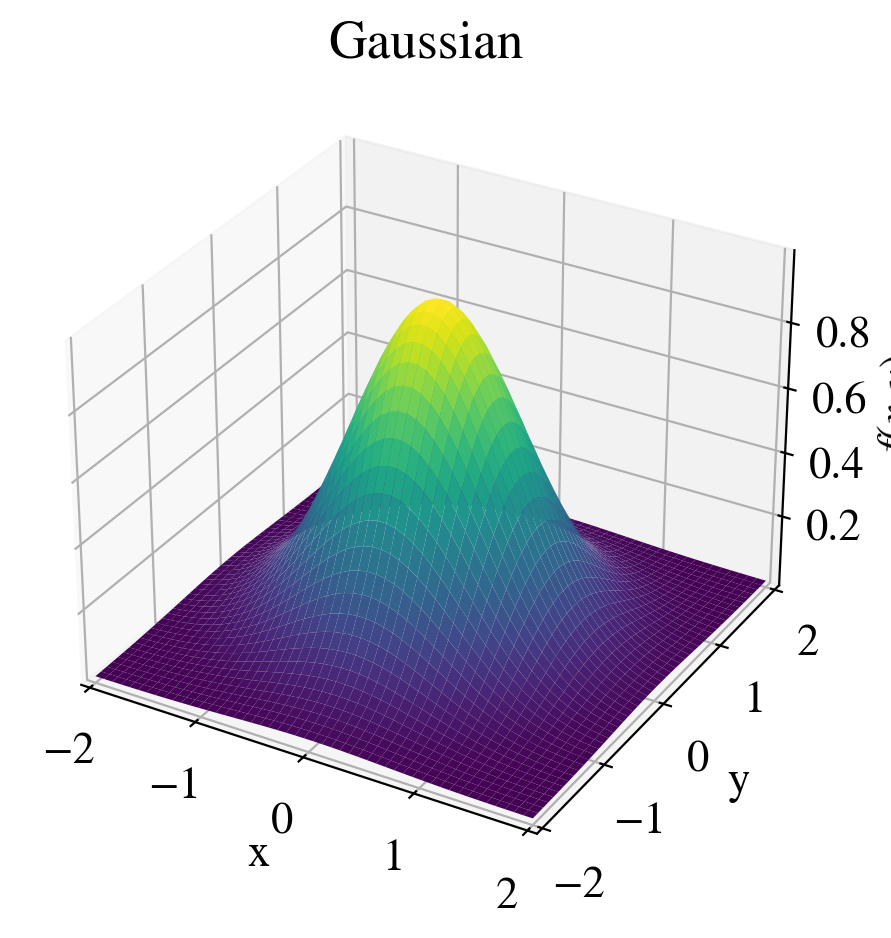

In [288]:
z = sp.exp(-x**2 - y**2)
plot3d(z, (x, -2, 2), (y, -2, 2), title='Gaussian', xlabel='x', ylabel='y')


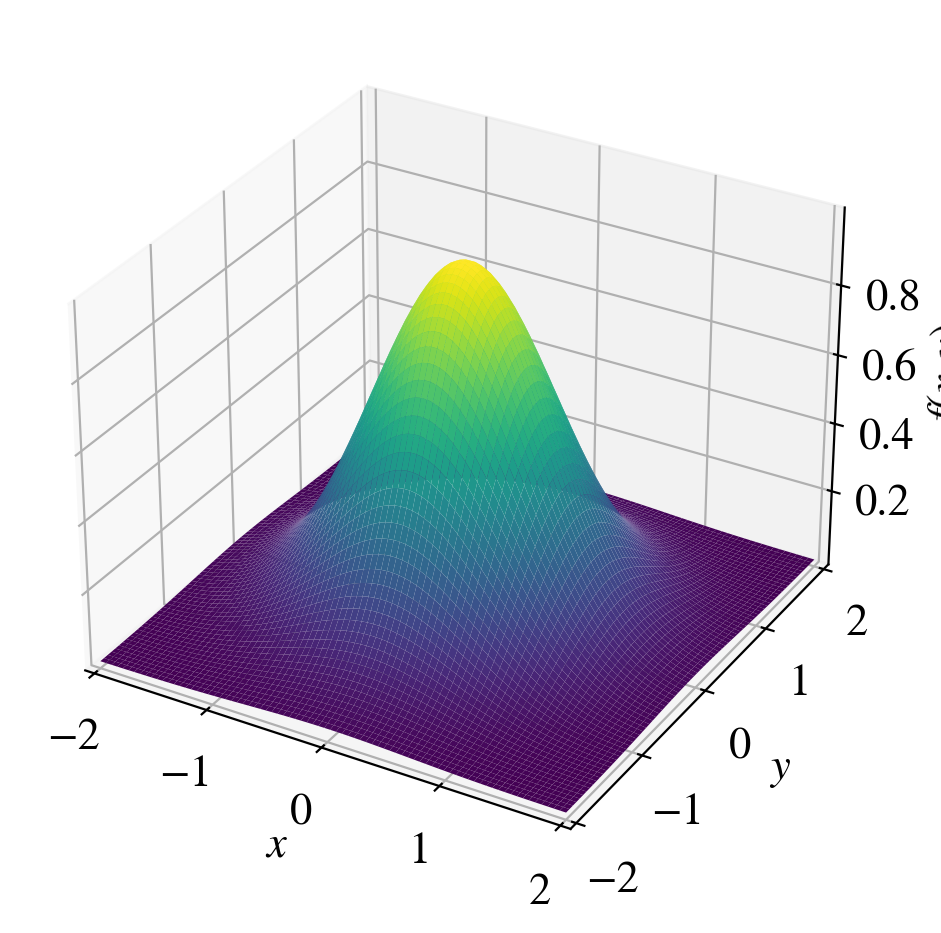

In [289]:
plot3d(z, (x, -2, 2), (y, -2, 2),
       nb_of_points_x=80, nb_of_points_y=80,
       surface_color=lambda X, Y, Z: Z)


### 8.5 3D 参数：`plot3d_parametric_line` / `surface`

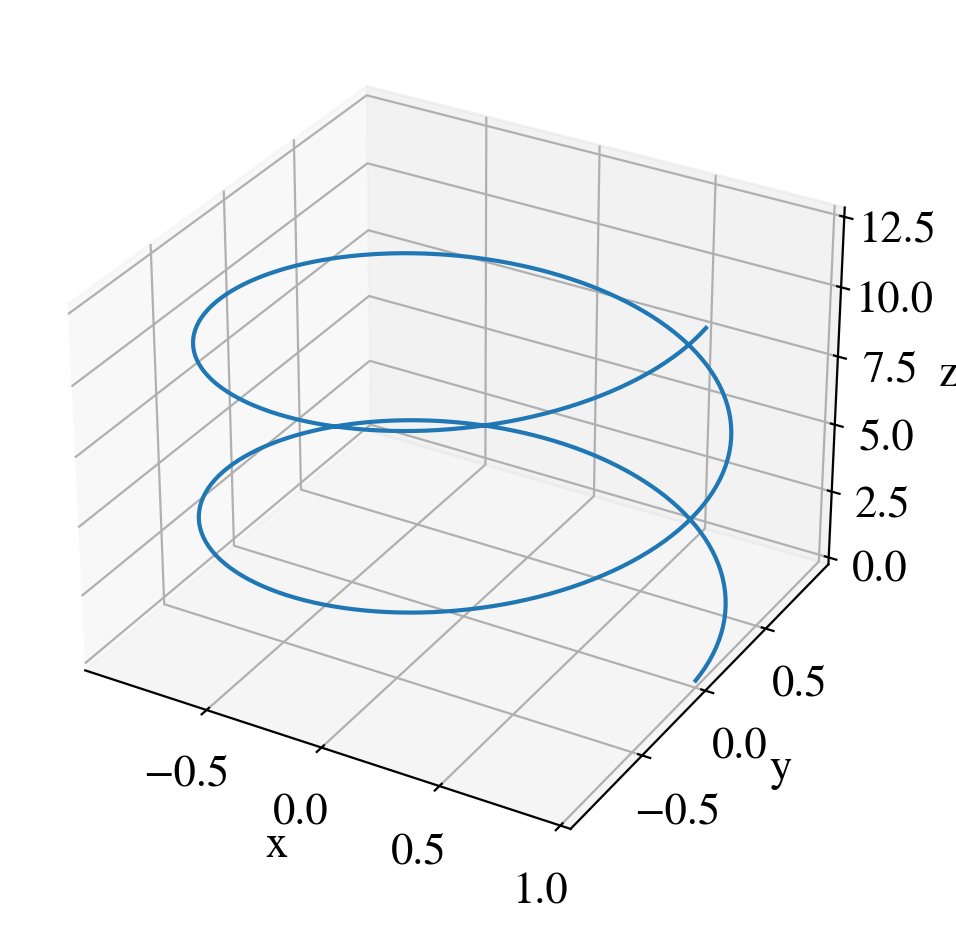

In [291]:
# 3D 空间曲线：螺旋线
plot3d_parametric_line(sp.cos(t), sp.sin(t), t, (t, 0, 4*pi))


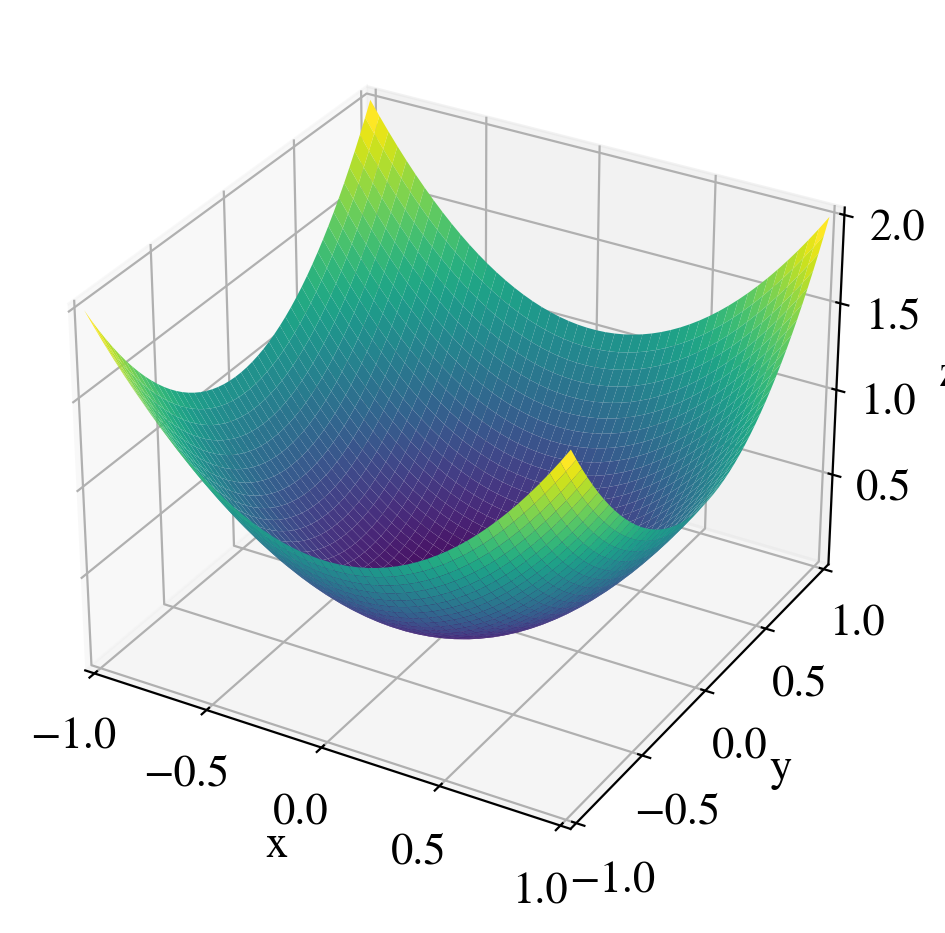

In [292]:
# 3D 参数曲面：抛物面片 (u,v) -> (u, v, u^2+v^2)
u, v = sp.symbols('u v', real=True)
plot3d_parametric_surface(u, v, u**2 + v**2, (u, -1, 1), (v, -1, 1))


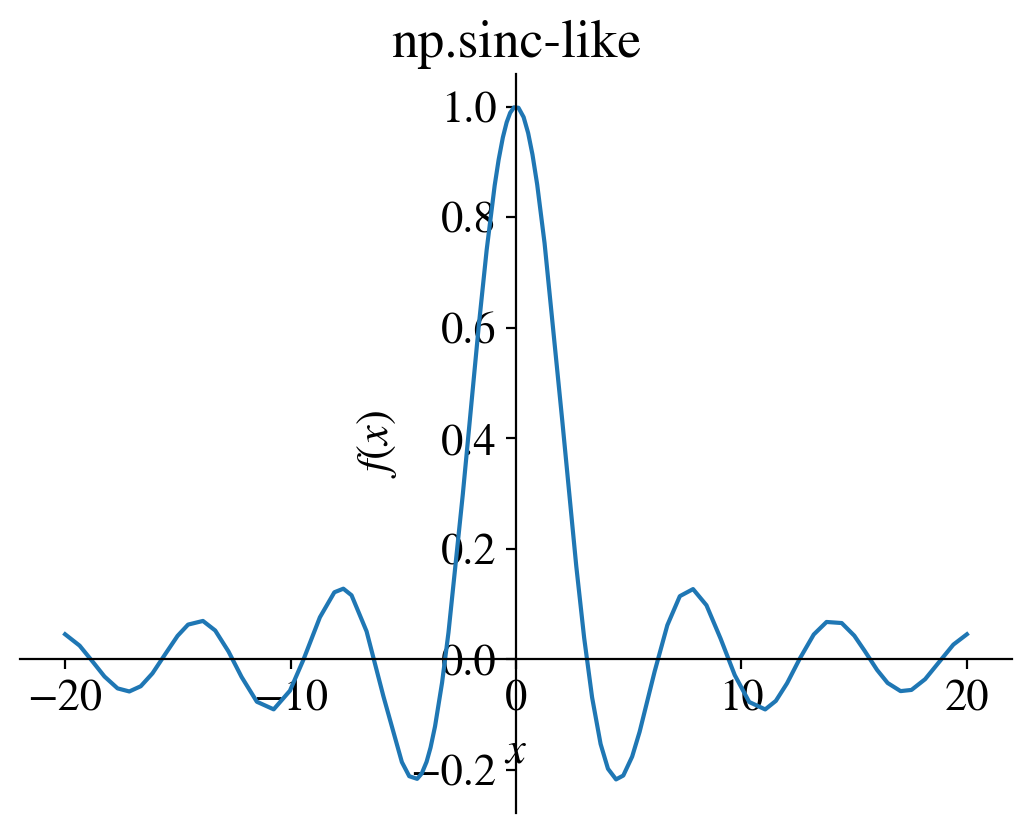

In [293]:
# 保存到文件
p = plot(sp.sinc(x), (x, -20, 20), title='np.sinc-like', show=False)
p.save('sympy_plot.png')   # 保存为 PNG（也支持 .pdf 等）pdf是矢量图


### 课堂小练习

1. 画 $\exp(-x^2)$ 与其一阶导数在 $[-3,3]$ 的曲线；

2. 画 $\sin(x)$ 的 $3、5、7$ 项泰勒近似，与真值对比。,r'$\frac{d e^{-x^2}}{d x}$'

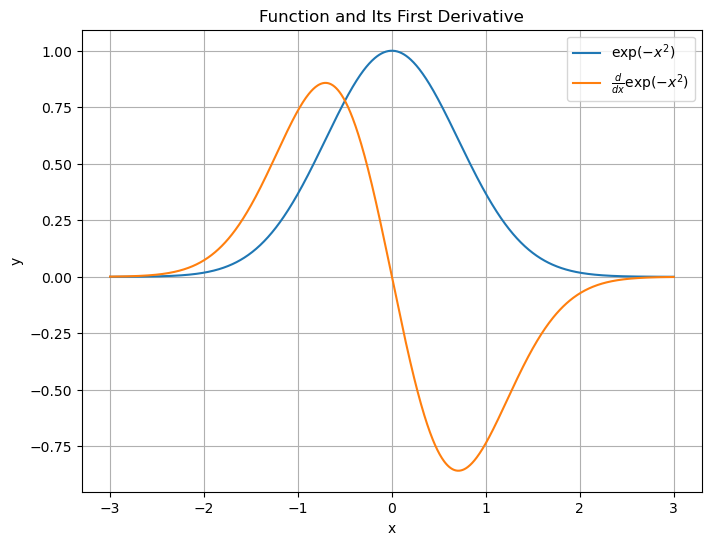

In [25]:
## 你的代码
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-3, 3, 1000)

f = np.exp(-x**2)
f_prime = -2 * x * np.exp(-x**2)


plt.figure(figsize=(8, 6))
plt.plot(x, f, label=r'$\exp(-x^2)$')
plt.plot(x, f_prime, label=r'$\frac{d}{dx}\exp(-x^2)$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function and Its First Derivative')
plt.legend()
plt.grid(True)
plt.show()

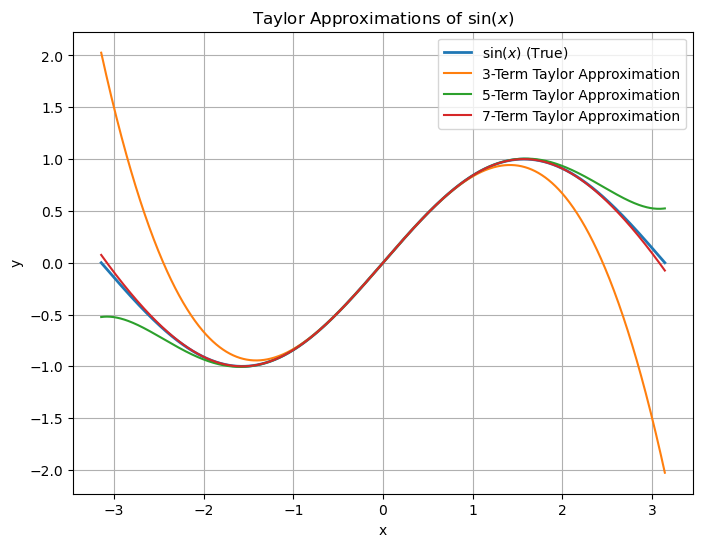

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# 生成x轴数据
x = np.linspace(-np.pi, np.pi, 1000)
# 真值
sin_true = np.sin(x)
# 泰勒近似
taylor3 = x - x**3/6
taylor5 = x - x**3/6 + x**5/120
taylor7 = x - x**3/6 + x**5/120 - x**7/5040

# 绘图
plt.figure(figsize=(8, 6))
plt.plot(x, sin_true, label=r'$\sin(x)$ (True)', linewidth=2)
plt.plot(x, taylor3, label='3-Term Taylor Approximation')
plt.plot(x, taylor5, label='5-Term Taylor Approximation')
plt.plot(x, taylor7, label='7-Term Taylor Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Taylor Approximations of $\sin(x)$')
plt.legend()
plt.grid(True)
plt.show()

---
## 9. 进阶函数

- `Piecewise` 分段函数：便于定义分段物理模型。

$$
\begin{cases} 
x & \text{for} \: x < 0 \\ 
0 & \text{otherwise} 
\end{cases}
$$

In [298]:
# 分段函数例：弹簧受限位移
f = sp.Piecewise( (x, x<0), (0, True))
f

⎧x  for x < 0
⎨            
⎩0  otherwise

In [299]:
sp.diff(f, x)

⎧1  for x < 0
⎨            
⎩0  otherwise

In [300]:
print( sp.latex(f) )

\begin{cases} x & \text{for}\: x < 0 \\0 & \text{otherwise} \end{cases}


- `assumptions` 假设：如 `positive=True` 影响化简/求根。

- 常微分方程 `dsolve`：一阶、二阶线性 `ODE` 快速求解（带 ics 初值）

$$
\frac{d}{d t} v{\left(t \right)} = \frac{g}{m} - \frac{k v{\left(t \right)}}{m}
$$

In [303]:
# 一阶 ODE 示例： m dv/dt = g - k v
t, m, k, g = sp.symbols('t m k g', positive=True)
v = sp.Function('v')
ode = sp.Eq( sp.diff(v(t), t), g/m - (k/m)*v(t))
ode

In [304]:
sp.dsolve(ode, ics={v(0): 0})

In [305]:
#print( sp.latex(ode) )

## 10. 实战练习

- 任务 A： 解并可视化 $f(x) = \frac{\sin(x)}{x} $ 的泰勒 $3、5、7$ 项近似在 $[0, 10]$ 的误差曲线。
- 任务 B： 以 $A=[[2,1],[1,3]]$、$b=[5,7]$ 为例，既用 `LUsolve` 求解线性方程，又用 `inv` 和 `*` 验证同解。
- 任务 C：写出 $s = v_0 t + \frac{1}{2} a t^2$，设 $s=20$ m, $v_0=3$ m/s, $a=1$ m/s$^2$，解 $t$，筛选物理根并解释。

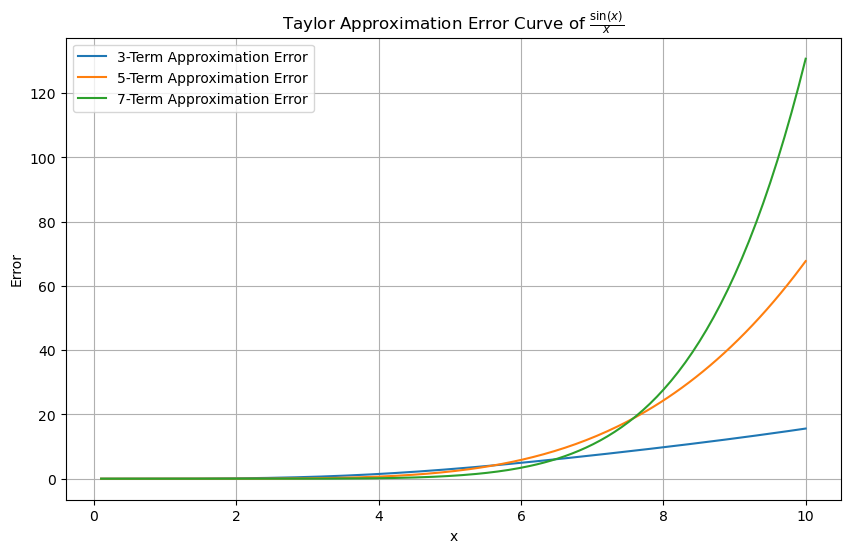

In [39]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.symbols('x')
f = sp.sin(x)/x

# Generate Taylor series expansions (3-term, 5-term, 7-term, corresponding to highest degree x^2, x^4, x^6)
taylor3 = sp.series(f, x, 0, 3).removeO()  # Expand up to x^2 term
taylor5 = sp.series(f, x, 0, 5).removeO()  # Expand up to x^4 term
taylor7 = sp.series(f, x, 0, 7).removeO()  # Expand up to x^6 term

# Convert to numerical functions
f_numeric = sp.lambdify(x, f, 'numpy')
taylor3_numeric = sp.lambdify(x, taylor3, 'numpy')
taylor5_numeric = sp.lambdify(x, taylor5, 'numpy')
taylor7_numeric = sp.lambdify(x, taylor7, 'numpy')

# Generate x interval
x_vals = np.linspace(0.1, 10, 200)  # Avoid x=0 (since the limit of the original function at x=0 is 1, and the series also gives 1 at x=0)

# Calculate function values and approximations
f_vals = f_numeric(x_vals)
t3_vals = taylor3_numeric(x_vals)
t5_vals = taylor5_numeric(x_vals)
t7_vals = taylor7_numeric(x_vals)

# Calculate errors
err3 = np.abs(f_vals - t3_vals)
err5 = np.abs(f_vals - t5_vals)
err7 = np.abs(f_vals - t7_vals)

# Visualize error curves
plt.figure(figsize=(10, 6))
plt.plot(x_vals, err3, label='3-Term Approximation Error')
plt.plot(x_vals, err5, label='5-Term Approximation Error')
plt.plot(x_vals, err7, label='7-Term Approximation Error')
plt.xlabel('x')
plt.ylabel('Error')
plt.title(r'Taylor Approximation Error Curve of $\frac{\sin(x)}{x}$')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
from sympy import Matrix, linsolve, eye

# 定义矩阵和向量
A = Matrix([[2, 1], [1, 3]])
b = Matrix([5, 7])

# 用linsolve求解
solution = linsolve((A, b), sp.symbols('x y'))
print("linsolve求解结果：", solution)

# 用逆矩阵验证（A^(-1)*b）
A_inv = A.inv()
solution_inv = A_inv * b
print("逆矩阵验证结果：", solution_inv)

# 用矩阵乘法验证（A*解 == b）
solution_mat = Matrix(list(solution)[0])
verify = A * solution_mat
print("矩阵乘法验证：", verify == b)

linsolve求解结果： {(8/5, 9/5)}
逆矩阵验证结果： Matrix([[8/5], [9/5]])
矩阵乘法验证： True


In [35]:
t = sp.symbols('t', real=True, positive=True)  # 限定t为正实数（物理意义：时间）
v0, a, s = 3, 1, 20
eq = sp.Eq(v0*t + 0.5*a*t**2, s)

# 求解方程
solutions = sp.solve(eq, t)
print("所有解：", solutions)

# 筛选物理根（t>0）
physical_sol = [s for s in solutions if s > 0]
print("物理根（有效时间）：", physical_sol)

所有解： [4.00000000000000]
物理根（有效时间）： [4.00000000000000]
